In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import cross_val_score

In [2]:
'''
Load CSV
'''
df = pd.read_csv("datasets/train_radiomics_hipocamp.csv")

'''
Inspecionar
'''

df.columns
display(df)

,ID,Image,Mask,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,...,lbp-3D-k_glszm_ZonePercentage,lbp-3D-k_glszm_ZoneVariance,lbp-3D-k_ngtdm_Busyness,lbp-3D-k_ngtdm_Coarseness,lbp-3D-k_ngtdm_Complexity,lbp-3D-k_ngtdm_Contrast,lbp-3D-k_ngtdm_Strength,Sex,Age,Transition
0,006_S_0681,/notebooks/disk2/DS2_FreeSurfer/ADNI_006_S_068...,/notebooks/disk2/DS2_FreeSurfer/ADNI_006_S_068...,2.2.0,1.18.5,1.2.4,1.1.1,3.7.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...",...,0.007881,345733.167092,479.414935,0.001538,0.183049,0.017044,0.001581,0,77.1,CN-CN
1,941_S_1203,/notebooks/disk2/DS2_FreeSurfer/ADNI_941_S_120...,/notebooks/disk2/DS2_FreeSurfer/ADNI_941_S_120...,2.2.0,1.18.5,1.2.4,1.1.1,3.7.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...",...,0.013112,244310.331892,378.001763,0.001761,0.146021,0.010782,0.001813,1,83.4,CN-CN
2,011_S_0003,/notebooks/disk2/DS2_FreeSurfer/ADNI_011_S_000...,/notebooks/disk2/DS2_FreeSurfer/ADNI_011_S_000...,2.2.0,1.18.5,1.2.4,1.1.1,3.7.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...",...,0.011331,222776.529605,497.261162,0.001567,0.190309,0.019644,0.001596,1,81.3,AD-AD
3,057_S_0779,/notebooks/disk2/DS2_FreeSurfer/ADNI_057_S_077...,/notebooks/disk2/DS2_FreeSurfer/ADNI_057_S_077...,2.2.0,1.18.5,1.2.4,1.1.1,3.7.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...",...,0.012197,280222.663268,406.837667,0.001629,0.148247,0.010824,0.001677,1,79.6,CN-MCI
4,033_S_0920,/notebooks/disk2/DS2_FreeSurfer/ADNI_033_S_092...,/notebooks/disk2/DS2_FreeSurfer/ADNI_033_S_092...,2.2.0,1.18.5,1.2.4,1.1.1,3.7.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...",...,0.010859,216779.591479,368.838125,0.001912,0.174701,0.014793,0.001979,0,80.1,CN-CN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,094_S_1241,/notebooks/disk2/DS2_FreeSurfer/ADNI_094_S_124...,/notebooks/disk2/DS2_FreeSurfer/ADNI_094_S_124...,2.2.0,1.18.5,1.2.4,1.1.1,3.7.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...",...,0.010593,270974.110643,438.460201,0.001615,0.170377,0.014580,0.001667,1,72.2,CN-CN
301,067_S_0177,/notebooks/disk2/DS2_FreeSurfer/ADNI_067_S_017...,/notebooks/disk2/DS2_FreeSurfer/ADNI_067_S_017...,2.2.0,1.18.5,1.2.4,1.1.1,3.7.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...",...,0.006170,350646.909722,434.517852,0.001757,0.195109,0.019239,0.001813,0,75.0,CN-CN
302,036_S_0748,/notebooks/disk2/DS2_FreeSurfer/ADNI_036_S_074...,/notebooks/disk2/DS2_FreeSurfer/ADNI_036_S_074...,2.2.0,1.18.5,1.2.4,1.1.1,3.7.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...",...,0.009848,290668.100995,311.365820,0.002103,0.137740,0.009686,0.002170,1,79.6,MCI-AD
303,053_S_0621,/notebooks/disk2/DS2_FreeSurfer/ADNI_053_S_062...,/notebooks/disk2/DS2_FreeSurfer/ADNI_053_S_062...,2.2.0,1.18.5,1.2.4,1.1.1,3.7.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...",...,0.014174,211613.548120,349.919451,0.001890,0.145615,0.010622,0.001936,0,62.4,MCI-MCI


In [3]:
'''
Colunas Inuteis
'''

# Identificar as colunas com o mesmo valor em todas as linhas
colunas_constantes = df.columns[df.nunique() == 1]

# Remover essas colunas do DataFrame
df = df.drop(columns=colunas_constantes)

In [4]:
# Mudar o id para numeros de 0 a 304
df['ID'] = pd.factorize(df['ID'])[0] + 1

display(df.head())

,ID,Image,Mask,diagnostics_Image-original_Hash,diagnostics_Image-original_Mean,diagnostics_Image-original_Maximum,diagnostics_Mask-original_Hash,diagnostics_Mask-original_BoundingBox,diagnostics_Mask-original_VoxelNum,diagnostics_Mask-original_CenterOfMassIndex,...,lbp-3D-k_glszm_ZonePercentage,lbp-3D-k_glszm_ZoneVariance,lbp-3D-k_ngtdm_Busyness,lbp-3D-k_ngtdm_Coarseness,lbp-3D-k_ngtdm_Complexity,lbp-3D-k_ngtdm_Contrast,lbp-3D-k_ngtdm_Strength,Sex,Age,Transition
0,1,/notebooks/disk2/DS2_FreeSurfer/ADNI_006_S_068...,/notebooks/disk2/DS2_FreeSurfer/ADNI_006_S_068...,b5d774a32163a7ee822d42a07808a787f8687f56,5.848123,178,315bdd7a06bb73df17bfc1297398b4398e36e180,"(103, 113, 93, 36, 30, 71)",7106,"(121.94230227976358, 129.27272727272728, 128.4...",...,0.007881,345733.167092,479.414935,0.001538,0.183049,0.017044,0.001581,0,77.1,CN-CN
1,2,/notebooks/disk2/DS2_FreeSurfer/ADNI_941_S_120...,/notebooks/disk2/DS2_FreeSurfer/ADNI_941_S_120...,397042d736bd790b7880b372b1749ff424f89cbe,5.238834,190,208a2b034b72592489315104ef526ca10d434f24,"(81, 127, 93, 47, 16, 73)",7779,"(107.06170458927883, 135.28088443244633, 128.2...",...,0.013112,244310.331892,378.001763,0.001761,0.146021,0.010782,0.001813,1,83.4,CN-CN
2,3,/notebooks/disk2/DS2_FreeSurfer/ADNI_011_S_000...,/notebooks/disk2/DS2_FreeSurfer/ADNI_011_S_000...,84d679a88812c4aaf03a6d99f00c913b2f64506f,6.816667,155,352220437f6381b051fd4173969519887b530df6,"(77, 119, 89, 49, 30, 81)",6707,"(103.3640972118682, 135.28164604144922, 128.98...",...,0.011331,222776.529605,497.261162,0.001567,0.190309,0.019644,0.001596,1,81.3,AD-AD
3,4,/notebooks/disk2/DS2_FreeSurfer/ADNI_057_S_077...,/notebooks/disk2/DS2_FreeSurfer/ADNI_057_S_077...,168f330d2ca3f097146e5d041f33b40672d230df,6.445162,171,9f62584e8badeb5de90b797d0c86c5170465d90f,"(93, 102, 90, 41, 29, 78)",8281,"(116.29827315541601, 118.67431469629271, 129.3...",...,0.012197,280222.663268,406.837667,0.001629,0.148247,0.010824,0.001677,1,79.6,CN-MCI
4,5,/notebooks/disk2/DS2_FreeSurfer/ADNI_033_S_092...,/notebooks/disk2/DS2_FreeSurfer/ADNI_033_S_092...,ea5f291ea107dfda5e5c725eae7c0555ced44ce4,5.568269,150,62ab23b0a4ea4c9e7574b1ea410bd90236fe1d6e,"(87, 119, 91, 40, 27, 75)",5986,"(108.26561977948546, 132.05462746408287, 127.6...",...,0.010859,216779.591479,368.838125,0.001912,0.174701,0.014793,0.001979,0,80.1,CN-CN


In [5]:
# Selecionar colunas numéricas
df_numerico = df.select_dtypes(include=['float64', 'int64'])

# Verificar as primeiras linhas do dataset filtrado
df = pd.concat([df_numerico, df['Transition']], axis=1)

In [6]:
# Calcular variâncias
variancias = df.var(numeric_only=True)

# Selecionar colunas com variância entre -0.2 e 0.2 (baixa variância)
colunas_baixa_variancia = variancias[(variancias >= -0.2) & (variancias <= 0.2)].index

# Remover colunas com baixa variância
dataset_filtrado = df.drop(columns=colunas_baixa_variancia)

# Verificar quantas colunas foram removidas
print(f"Colunas removidas: {colunas_baixa_variancia.tolist()}")
print(f"Número de colunas originais: {len(df.columns)}")
print(f"Número de colunas após remoção: {len(dataset_filtrado.columns)}")

df=dataset_filtrado

Colunas removidas: ['original_shape_Elongation', 'original_shape_Flatness', 'original_shape_Sphericity', 'original_shape_SurfaceVolumeRatio', 'original_firstorder_Entropy', 'original_firstorder_Skewness', 'original_firstorder_Uniformity', 'original_glcm_ClusterTendency', 'original_glcm_Contrast', 'original_glcm_Correlation', 'original_glcm_DifferenceAverage', 'original_glcm_DifferenceEntropy', 'original_glcm_DifferenceVariance', 'original_glcm_Id', 'original_glcm_Idm', 'original_glcm_Idmn', 'original_glcm_Idn', 'original_glcm_Imc1', 'original_glcm_Imc2', 'original_glcm_InverseVariance', 'original_glcm_JointAverage', 'original_glcm_JointEnergy', 'original_glcm_JointEntropy', 'original_glcm_MCC', 'original_glcm_MaximumProbability', 'original_glcm_SumAverage', 'original_glcm_SumEntropy', 'original_glcm_SumSquares', 'original_gldm_DependenceEntropy', 'original_gldm_DependenceNonUniformityNormalized', 'original_gldm_GrayLevelVariance', 'original_gldm_LowGrayLevelEmphasis', 'original_gldm_Sm

In [7]:
# Assumindo que 'Transition' é a variável target
X = df[df.drop(columns=['Transition']).columns]
y = df['Transition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2023, stratify=y)

In [8]:
model = DecisionTreeClassifier(random_state=2023)
model.fit(X, y)
feature_importances = model.feature_importances_

features_to_drop = []
for feature, importance in zip(X_train.columns, feature_importances):
    print(f"{feature}: {importance}")

    if importance < 0.01:
        features_to_drop.append(feature)

ID: 0.014209223574109154
diagnostics_Image-original_Mean: 0.0
diagnostics_Image-original_Maximum: 0.0
diagnostics_Mask-original_VoxelNum: 0.0
original_shape_LeastAxisLength: 0.0
original_shape_MajorAxisLength: 0.0
original_shape_Maximum2DDiameterColumn: 0.0
original_shape_Maximum2DDiameterRow: 0.0
original_shape_Maximum2DDiameterSlice: 0.0
original_shape_Maximum3DDiameter: 0.0
original_shape_MeshVolume: 0.0
original_shape_MinorAxisLength: 0.0
original_shape_SurfaceArea: 0.0
original_shape_VoxelVolume: 0.0
original_firstorder_10Percentile: 0.0
original_firstorder_90Percentile: 0.0
original_firstorder_Energy: 0.0
original_firstorder_InterquartileRange: 0.0
original_firstorder_Kurtosis: 0.0
original_firstorder_Maximum: 0.01788545736262238
original_firstorder_MeanAbsoluteDeviation: 0.0
original_firstorder_Mean: 0.0
original_firstorder_Median: 0.0
original_firstorder_Minimum: 0.0
original_firstorder_Range: 0.0
original_firstorder_RobustMeanAbsoluteDeviation: 0.0
original_firstorder_RootMean

In [9]:
X_train = X_train.drop(columns=features_to_drop)
X_test = X_test.drop(columns=features_to_drop)


X_train.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 228 entries, 195 to 304
Data columns (total 34 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   ID                                                             228 non-null    int64  
 1   original_firstorder_Maximum                                    228 non-null    int64  
 2   original_glrlm_RunLengthNonUniformity                          228 non-null    float64
 3   original_glszm_SmallAreaHighGrayLevelEmphasis                  228 non-null    float64
 4   wavelet-LHL_firstorder_InterquartileRange                      228 non-null    float64
 5   wavelet-LHL_firstorder_Mean                                    228 non-null    float64
 6   wavelet-LHL_gldm_DependenceNonUniformity                       228 non-null    float64
 7   wavelet-HLL_firstorder_Kurtosis                                22

In [10]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

              precision    recall  f1-score   support

       AD-AD       0.56      0.60      0.58        15
       CN-CN       0.89      0.71      0.79        24
      CN-MCI       0.00      0.00      0.00         3
      MCI-AD       0.64      0.53      0.58        17
     MCI-MCI       0.58      0.83      0.68        18

    accuracy                           0.65        77
   macro avg       0.54      0.53      0.53        77
weighted avg       0.67      0.65      0.65        77



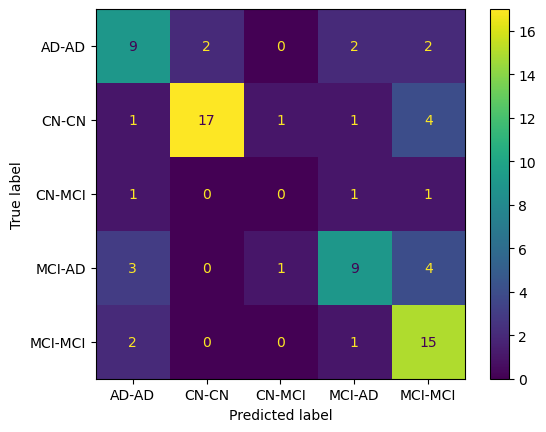

In [11]:
dtc = DecisionTreeClassifier(random_state=2023)
dtc.fit(X_train, y_train)
predictionDTC = dtc.predict(X_test)


print(classification_report(y_test, predictionDTC))
ConfusionMatrixDisplay.from_predictions(y_test, predictionDTC)
plt.show()

In [12]:
scores = cross_val_score(dtc, X, y, cv=10)
scores

array([0.4516129 , 0.38709677, 0.4516129 , 0.48387097, 0.32258065,
       0.46666667, 0.43333333, 0.33333333, 0.53333333, 0.3       ])

              precision    recall  f1-score   support

       AD-AD       0.00      0.00      0.00        15
       CN-CN       0.32      0.96      0.47        24
      CN-MCI       0.00      0.00      0.00         3
      MCI-AD       0.00      0.00      0.00        17
     MCI-MCI       0.00      0.00      0.00        18

    accuracy                           0.30        77
   macro avg       0.06      0.19      0.09        77
weighted avg       0.10      0.30      0.15        77



C:\Users\rafaa\miniconda3\envs\mypython3version\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rafaa\miniconda3\envs\mypython3version\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rafaa\miniconda3\envs\mypython3version\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

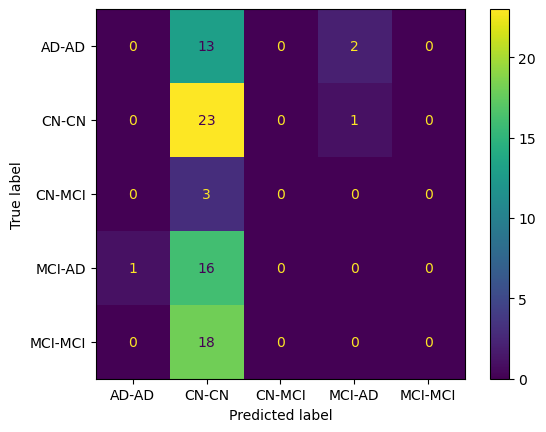

In [13]:
from sklearn.svm import SVC

svc = SVC(random_state=2023)
svc.fit(X_train, y_train)
predictionSVC = svc.predict(X_test)

print(classification_report(y_test, predictionSVC))
ConfusionMatrixDisplay.from_predictions(y_test, predictionSVC)
plt.show()

              precision    recall  f1-score   support

       AD-AD       0.57      0.80      0.67        15
       CN-CN       0.62      0.67      0.64        24
      CN-MCI       0.00      0.00      0.00         3
      MCI-AD       0.42      0.29      0.34        17
     MCI-MCI       0.44      0.44      0.44        18

    accuracy                           0.53        77
   macro avg       0.41      0.44      0.42        77
weighted avg       0.50      0.53      0.51        77



C:\Users\rafaa\miniconda3\envs\mypython3version\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rafaa\miniconda3\envs\mypython3version\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rafaa\miniconda3\envs\mypython3version\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

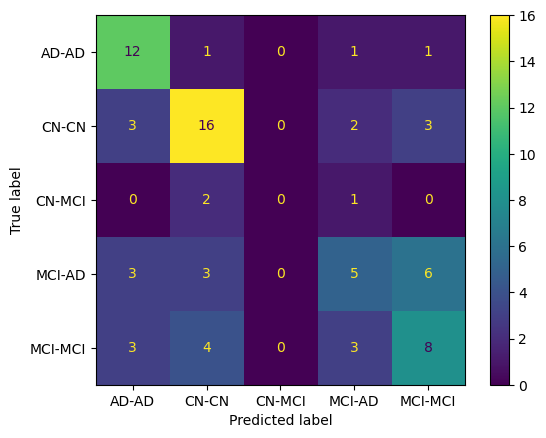

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(random_state=2023)
gbm.fit(X_train, y_train)
predictionGBM = gbm.predict(X_test)

print(classification_report(y_test, predictionGBM))
ConfusionMatrixDisplay.from_predictions(y_test, predictionGBM)
plt.show()

              precision    recall  f1-score   support

       AD-AD       0.58      0.73      0.65        15
       CN-CN       0.61      0.79      0.69        24
      CN-MCI       0.00      0.00      0.00         3
      MCI-AD       0.38      0.29      0.33        17
     MCI-MCI       0.50      0.39      0.44        18

    accuracy                           0.55        77
   macro avg       0.42      0.44      0.42        77
weighted avg       0.51      0.55      0.52        77



C:\Users\rafaa\miniconda3\envs\mypython3version\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rafaa\miniconda3\envs\mypython3version\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rafaa\miniconda3\envs\mypython3version\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

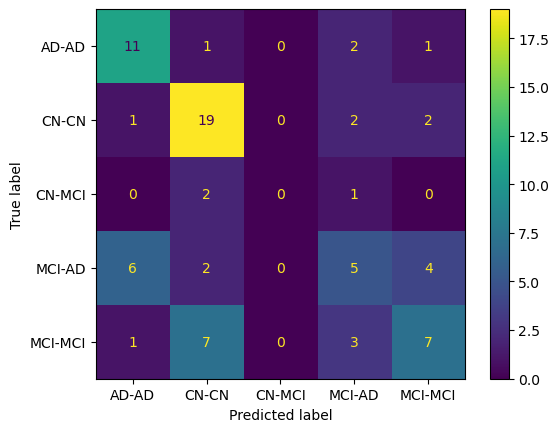

In [15]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=2023)
rfc.fit(X_train, y_train)
predictionRFC = rfc.predict(X_test)

print(classification_report(y_test, predictionRFC))
ConfusionMatrixDisplay.from_predictions(y_test, predictionRFC)
plt.show()

C:\Users\rafaa\miniconda3\envs\mypython3version\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

       AD-AD       0.00      0.00      0.00        15
       CN-CN       0.00      0.00      0.00        24
      CN-MCI       0.00      0.00      0.00         3
      MCI-AD       0.00      0.00      0.00        17
     MCI-MCI       0.23      1.00      0.38        18

    accuracy                           0.23        77
   macro avg       0.05      0.20      0.08        77
weighted avg       0.05      0.23      0.09        77



C:\Users\rafaa\miniconda3\envs\mypython3version\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rafaa\miniconda3\envs\mypython3version\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


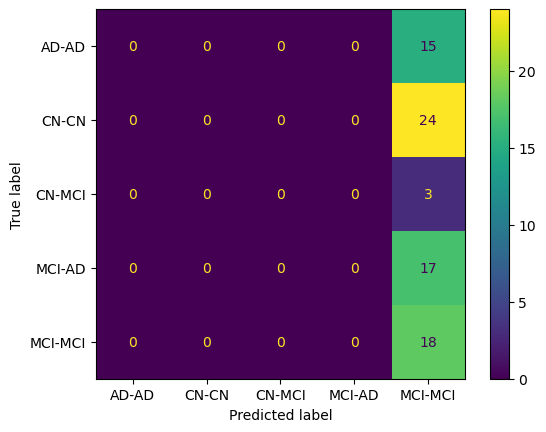

In [16]:
from sklearn.neural_network import MLPClassifier

# mlp = MLPClassifier(solver='adam', alpha=1e-4, hidden_layer_sizes=(50), max_iter=100000, random_state=2023)
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate='invscaling', solver='sgd')

mlp.fit(X_train, y_train)
predictionMLP = mlp.predict(X_test)

print(classification_report(y_test, predictionMLP))
ConfusionMatrixDisplay.from_predictions(y_test, predictionMLP)
plt.show()

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

test_DShippo = pd.read_csv("datasets/test_radiomics_hipocamp.csv")

# 2. Preparar os dados (ajuste conforme necessário)
# Exemplo: Separar X e y no conjunto de treinamento
X = df.drop(columns=['Transition'])  # Substitua 'Transition' pelo nome correto da coluna de rótulo
y = df['Transition']

# Remover colunas em que todos os valores são iguais
columns_nunique_2 = test_DShippo.columns[test_DShippo.nunique() == 1]
test_DShippo = test_DShippo.drop(columns=columns_nunique_2)

# Transformar a coluna 'ID' em valores numéricos
test_DShippo['ID'] = pd.factorize(test_DShippo['ID'])[0] + 1

# Selecionar apenas as colunas numéricas
colunas_numericas1 = test_DShippo.select_dtypes(include=['number']).columns.tolist()  # Converter para lista

# Adicionar a coluna 'Transition' se ela estiver presente
if 'Transition' in test_DShippo.columns:
    colunas_numericas1.append('Transition')

# Criar um novo DataFrame com as colunas numéricas e 'Transition'
# Filtrar apenas colunas que estão no DataFrame
colunas_validas = [col for col in colunas_numericas1 if col in test_DShippo.columns]

# Verificar se há colunas válidas para indexar
if not colunas_validas:
    raise ValueError("Nenhuma coluna válida encontrada para filtrar o DataFrame.")

# Indexar o DataFrame com as colunas válidas
test_DShippo_filtered = test_DShippo[colunas_validas]

# 4. Prever no conjunto de teste
# Prepare os dados de teste da mesma forma que os dados de treinamento
X_test = test_DShippo_filtered

# Dividir os dados em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Treinar o modelo
model = RandomForestClassifier(random_state=2023)
model.fit(X_train, y_train)

y_val_pred = model.predict(X_val)
print(classification_report(y_val, y_val_pred))
print(f"Accuracy: {accuracy_score(y_val, y_val_pred)}")

# Garantir que as colunas do conjunto de teste sejam as mesmas do treino
X_test = X_test[X_train.columns]

# Prever no conjunto de teste
test_predictions = model.predict(X_test)


# 5. Criar o DataFrame de submissão
submission = pd.DataFrame({
    'RowId': test_DShippo['ID'],  # Manter a coluna de identificação
    'Result': test_predictions  # Nome correto para o rótulo previsto
})

# 6. Salvar o arquivo
submission.to_csv('datasets_alterados/dummy_submission.csv', index=False)

print('Arquivo dummy_submission.csv criado com sucesso.')

              precision    recall  f1-score   support

       AD-AD       0.45      0.38      0.42        13
       CN-CN       0.54      0.67      0.60        21
      MCI-AD       0.31      0.45      0.37        11
     MCI-MCI       0.38      0.19      0.25        16

    accuracy                           0.44        61
   macro avg       0.42      0.42      0.41        61
weighted avg       0.44      0.44      0.43        61

Accuracy: 0.4426229508196721
Arquivo dummy_submission.csv criado com sucesso.
